In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
import time

In [2]:
df = pd.read_csv('my_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
other_df = df[['Survived', 'Pclass', 'Age', 'Fare', 'Embarked']]
other_df['Relatives'] = df.SibSp + df.Parch
other_df = other_df.dropna()
other_df.Embarked.replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2], inplace=True)

<ipython-input-3-1310b1ead473>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['Relatives'] = df.SibSp + df.Parch


In [4]:
X = other_df.drop('Survived', axis=1)
y = other_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Simple decision tree

In [5]:
clf_simple = DecisionTreeClassifier()
clf_simple.fit(X_train, y_train)
print('Train score:', clf_simple.score(X_train, y_train))
print('Test score:', clf_simple.score(X_test, y_test))

Train score: 0.9877116719652241
Test score: 0.624176052317434


In [6]:
clf_simple.get_depth()

55

In [7]:
clf_simple.feature_importances_

array([0.05343374, 0.23726067, 0.51849938, 0.14149629, 0.04930992])

In [8]:
predicted = clf_simple.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.5598986608758596
Recall: 0.5636385717755648


------------------

Small decision tree

In [28]:
clf_small = DecisionTreeClassifier(max_depth=4)
clf_small.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [29]:
print('Train score:', clf_small.score(X_train, y_train))
print('Test score:', clf_small.score(X_test, y_test))

Train score: 0.70164147148511
Test score: 0.7044168786007162


In [30]:
clf_small.feature_importances_

array([0.21478765, 0.00525184, 0.07765562, 0.67916074, 0.02314416])

In [31]:
predicted = clf_small.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.5009048136083967
Recall: 0.7271453590192645


----------------------

Dependency on maximal tree depth

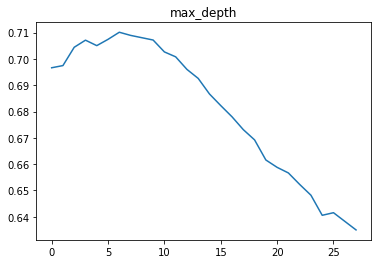

In [32]:
acc = []
for max_depth in range(2, 30):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(acc)
plt.title('max_depth')
plt.show()

--------------------

Dependency on min_samples_split parameter

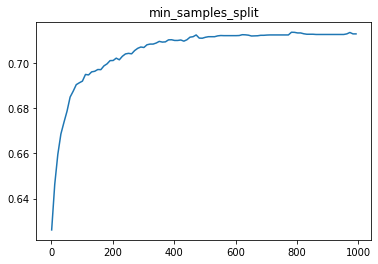

In [33]:
acc = []
values = range(2, 1000, 10)
for min_samples_split in values:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_split')
plt.show()

---------------------

Dependency on min_samples_leaf parameter

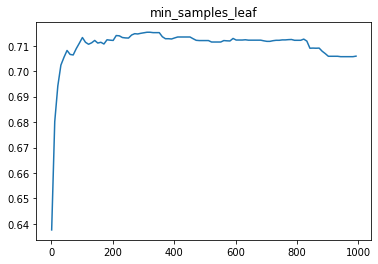

In [47]:
acc = []
values = range(2, 1000, 10)
for min_samples_leaf in values:
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_leaf')
plt.show()

-----------------

In [48]:
clf_best = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_split': range(500, 1000, 50),
    'min_samples_leaf': range(200, 800, 80),
    'max_depth': range(3, 15),
})

In [49]:
start = time.time()
clf_best.fit(X_train, y_train)
print(time.time() - start)

1275.3524854183197


In [50]:
print('Train score:', clf_best.score(X_train, y_train))
print('Test score:', clf_best.score(X_test, y_test))

Train score: 0.7165898916499059
Test score: 0.7135516686562516


In [51]:
clf_best.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=360,
                       min_samples_split=500)

In [52]:
predicted = clf_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.5869224273133068
Recall: 0.6989942528735632


-----------------------

In [53]:
clf_other_best = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_split': range(500, 1000, 50),
    'min_samples_leaf': range(200, 800, 60),
})

In [54]:
start = time.time()
clf_other_best.fit(X_train, y_train)
print(time.time() - start)

180.0956530570984


In [55]:
print('Train score:', clf_other_best.score(X_train, y_train))
print('Test score:', clf_other_best.score(X_test, y_test))

Train score: 0.7163044183481476
Test score: 0.7141744952509472


In [56]:
clf_other_best.best_estimator_

DecisionTreeClassifier(min_samples_leaf=320, min_samples_split=950)

In [57]:
clf_other_best.best_estimator_

DecisionTreeClassifier(min_samples_leaf=320, min_samples_split=950)

In [58]:
predicted = clf_other_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.5940402943660272
Recall: 0.6968581941692612


In [59]:
clf_other_best.best_estimator_.tree_.max_depth

15